In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import warnings
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
matplotlib.rcParams['figure.figsize'] = (13.0, 9.0)
matplotlib.style.use('ggplot')

In [3]:
url = "/bigdata/jelicicna/output_datasets/limited_data_nextbike_2020-01.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

In [4]:
warnings.filterwarnings("ignore")

# Distances Analysis

### Inital view of the data

<AxesSubplot:xlabel='distance', ylabel='Density'>

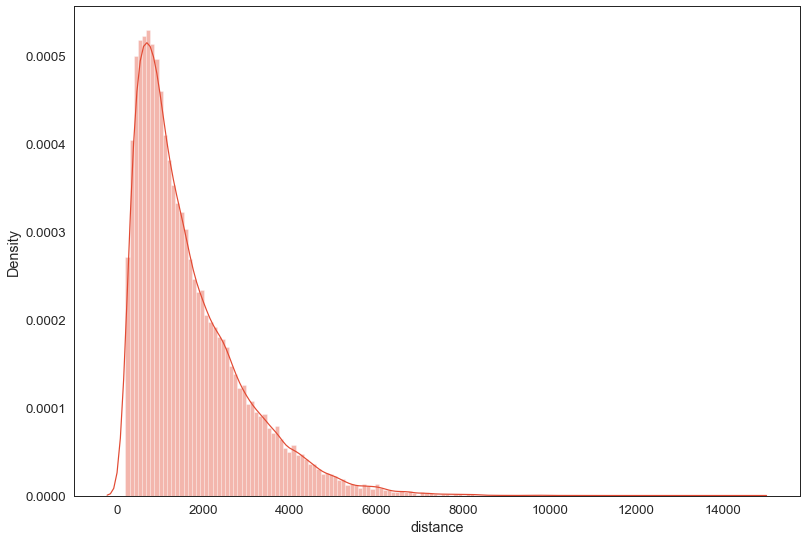

In [5]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['distance'], bins = 150)

In [6]:
distance = df["distance"].values

### Fitting continuous + common distributions

,sumsquare_error,aic,bic,kl_div
beta,1.925132e-08,4019.982020,-1.525753e+06,inf
burr,1.081234e-07,3386.548783,-1.433844e+06,inf
alpha,3.342506e-07,3302.989428,-1.373746e+06,inf
norm,7.110876e-07,7292.364602,-1.333551e+06,inf
bradford,7.815756e-07,3004.794788,-1.328507e+06,inf


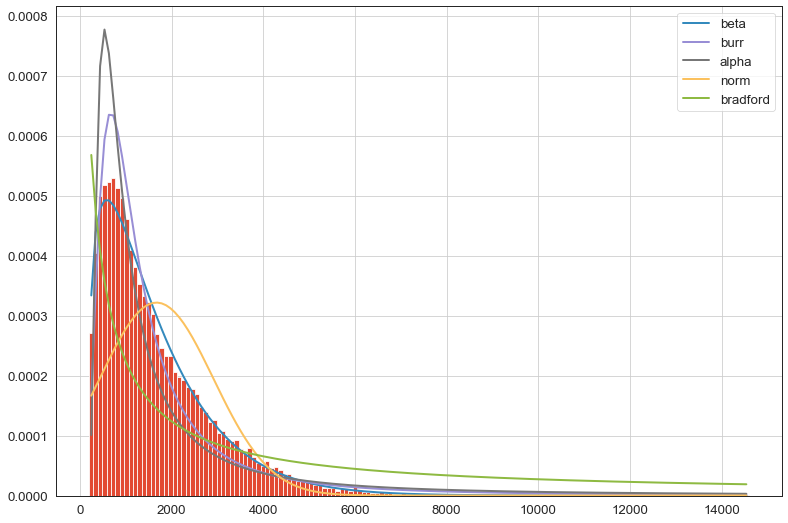

In [7]:
f = Fitter(distance,
           distributions= ['alpha','beta','norm','bradford','burr'], bins=150)
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
chi,1.507748e-07,4912.852720,-1.416146e+06,inf
expon,2.369215e-07,3659.221715,-1.392086e+06,inf
dgamma,5.141650e-07,4549.061450,-1.350810e+06,inf
cosine,2.270538e-06,3125.958278,-1.271719e+06,inf
chi2,3.388877e-06,567077.260116,-1.250379e+06,3.648024


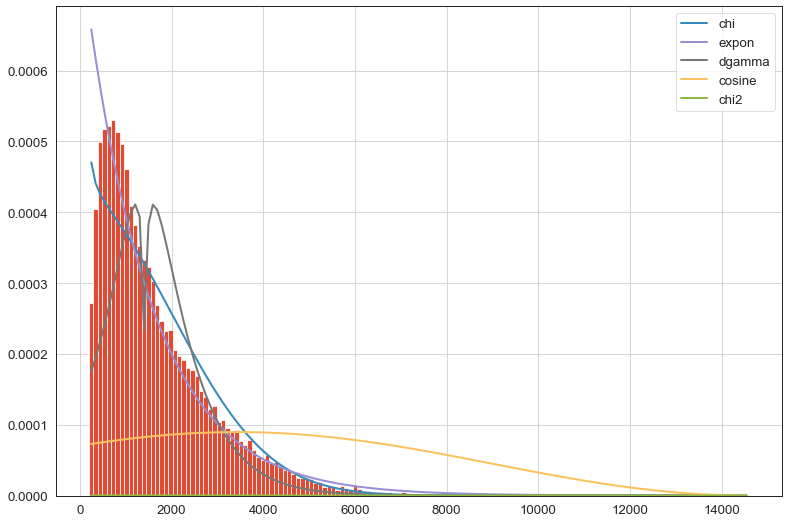

In [8]:
f = Fitter(distance,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins=150)
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
gamma,1.514178e-08,3896.844243,-1.538552e+06,inf
exponnorm,4.046505e-08,3735.582973,-1.486200e+06,inf
f,5.954752e-08,3653.172376,-1.465613e+06,inf
fisk,7.480966e-08,3436.153484,-1.453472e+06,inf
fatiguelife,2.434708e-07,4605.532367,-1.390623e+06,inf


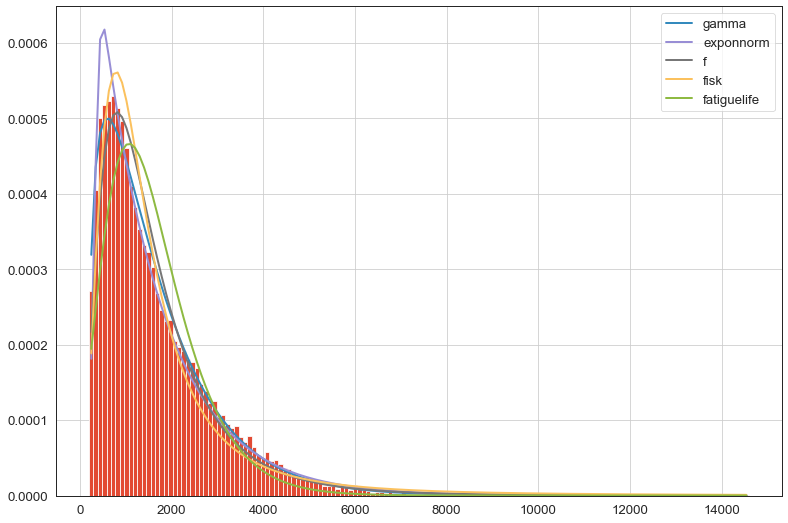

In [9]:
f = Fitter(distance,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins=150)
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
genexpon,2.371360e-07,3665.387568,-1.392006e+06,inf
gengamma,2.842522e-07,3618.619919,-1.382364e+06,inf
levy,5.450705e-07,3214.982401,-1.347712e+06,inf
loggamma,7.212604e-07,7476.273320,-1.332784e+06,inf
lognorm,3.059330e-06,3627.584629,-1.255827e+06,inf


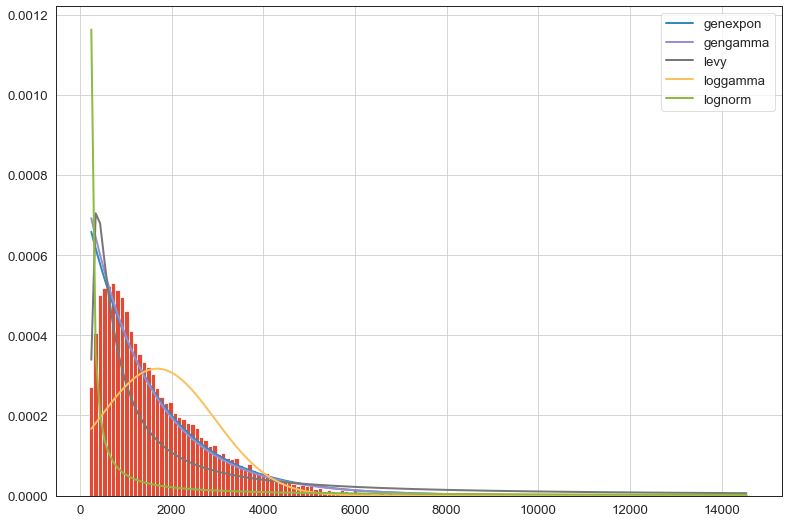

In [10]:
f = Fitter(distance,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins=150)
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
t,5.255404e-07,3968.635663,-1.349644e+06,inf
logistic,5.753842e-07,4731.932971,-1.344829e+06,inf
powerlaw,1.599890e-06,2989.720290,-1.290353e+06,inf
pareto,4.125186e-06,3326.860387,-1.239907e+06,inf


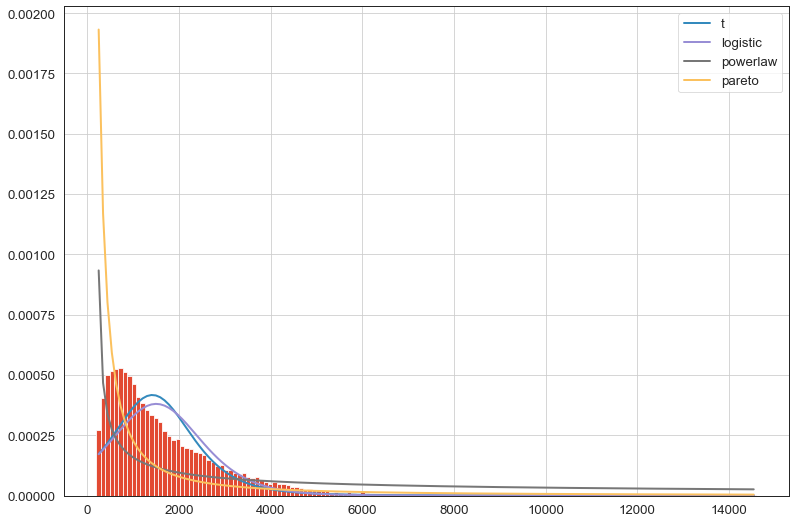

In [11]:
f = Fitter(distance,
           distributions= ['logistic','pareto','powerlaw','t'], bins=150)
f.fit()
f.summary()

### Best distributions chosen from the above analysis

,sumsquare_error,aic,bic,kl_div
gamma,1.980989e-08,3535.471555,-1.524181e+06,inf
beta,2.514385e-08,3603.688687,-1.511472e+06,inf
burr,9.829594e-08,3297.264899,-1.438863e+06,inf
chi,1.749125e-07,4107.814730,-1.408182e+06,inf
genexpon,2.948108e-07,3385.919531,-1.380357e+06,inf


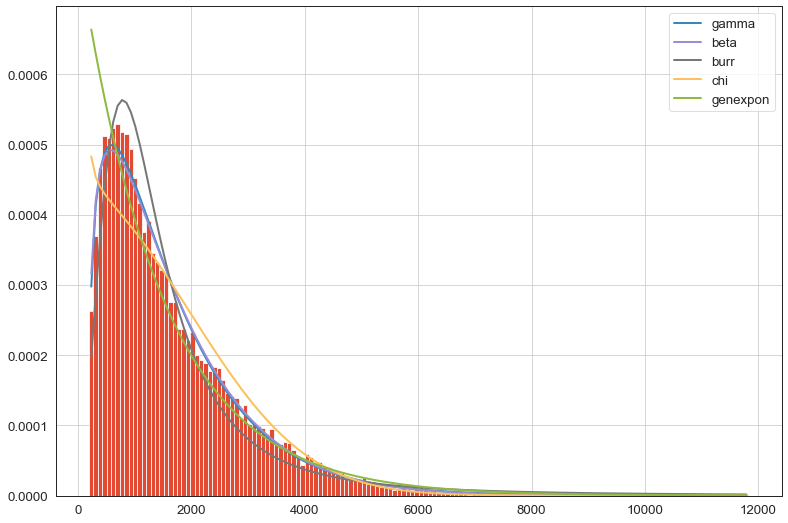

In [12]:
f = Fitter(distance,
           distributions= ['beta','burr','gamma','chi','genexpon', 't'],xmax=12000,bins=150)

f.fit()
f.summary()

## Gamma and Beta

,sumsquare_error,aic,bic,kl_div
gamma,1.980989e-08,3535.471555,-1.524181e+06,inf
beta,2.514385e-08,3603.688687,-1.511472e+06,inf


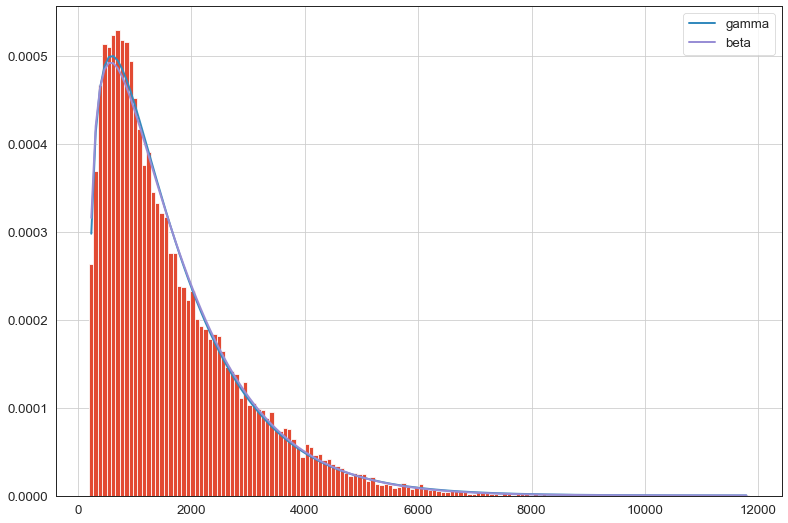

In [13]:
f = Fitter(distance,
           distributions= ['beta','gamma'],xmax=12000,bins=150)

f.fit()
f.summary()

In [14]:
f.get_best(method = 'sumsquare_error')

{'gamma': {'a': 1.37242588931524,
  'loc': 198.38376662709828,
  'scale': 1072.6303609274692}}

In [15]:
f.get_best(method = 'aic')

{'gamma': {'a': 1.37242588931524,
  'loc': 198.38376662709828,
  'scale': 1072.6303609274692}}

In [16]:
f.get_best(method = 'bic')

{'gamma': {'a': 1.37242588931524,
  'loc': 198.38376662709828,
  'scale': 1072.6303609274692}}

## Rides Analysis

### Inital view of the data

<AxesSubplot:xlabel='ride_time', ylabel='Density'>

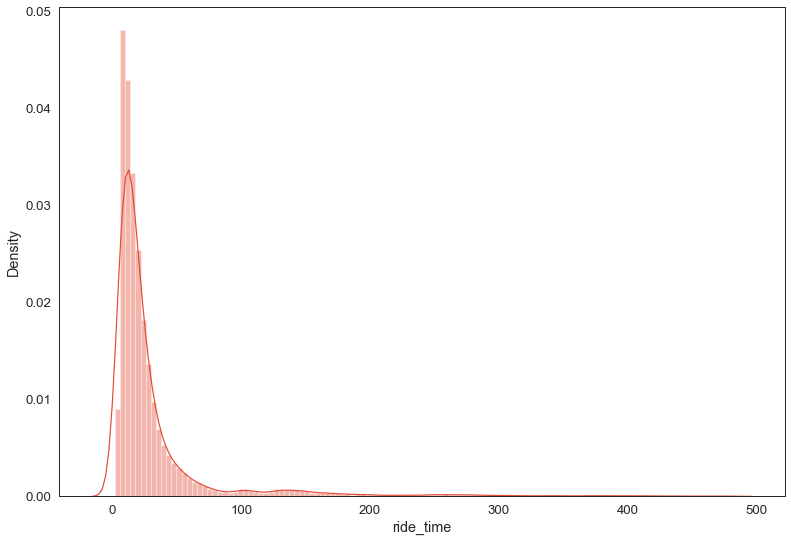

In [17]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['ride_time'], bins = 120)

In [18]:
rides = df["ride_time"].values

### Fitting continuous + common distributions

,sumsquare_error,aic,bic,kl_div
burr,0.000029,2119.470167,-1.135468e+06,0.015479
alpha,0.000041,2076.649165,-1.117234e+06,0.012575
beta,0.001794,2662.269346,-9.163453e+05,0.254706
norm,0.004407,3986.765561,-8.685036e+05,0.815669
bradford,0.004696,1555.679700,-8.651039e+05,1.254383


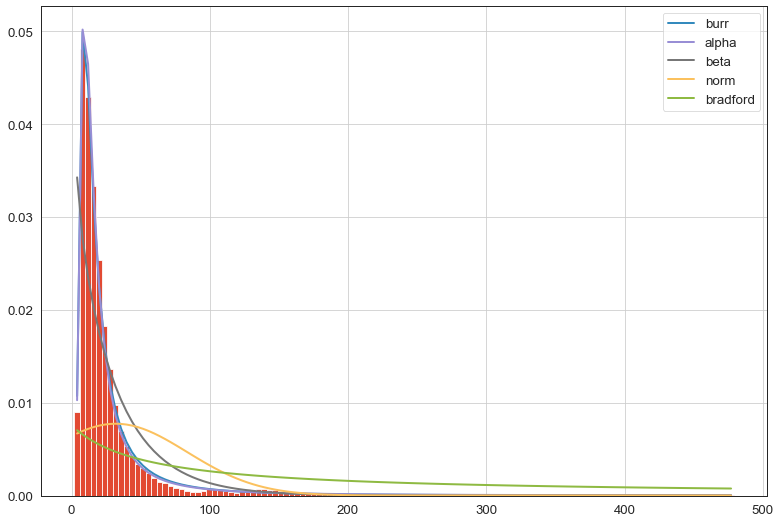

In [19]:
f = Fitter(rides,
           distributions= ['alpha','beta','norm','bradford','burr'], bins = 120)
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
dgamma,0.001509,2667.231250,-925557.023757,0.095048
expon,0.001627,2734.228143,-921571.888910,0.239891
chi2,0.001759,2657.676996,-917401.076391,0.250287
chi,0.002849,2978.060611,-891721.928618,0.439318
cosine,0.005946,1703.762629,-852544.953001,1.669489


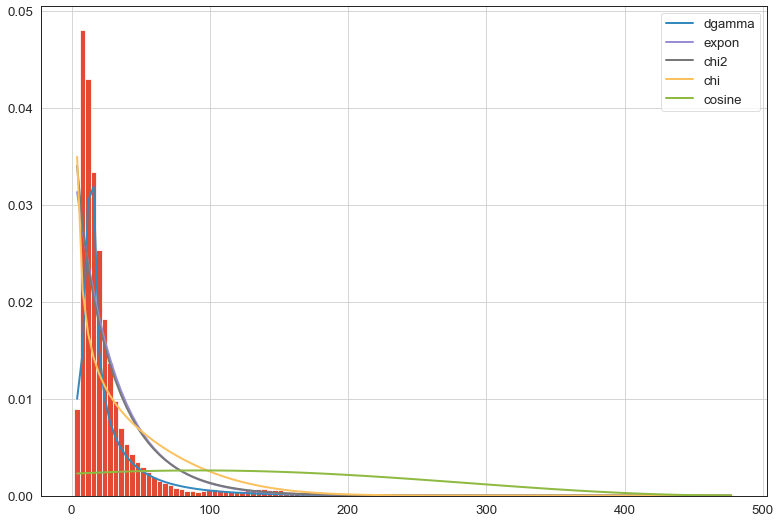

In [20]:
f = Fitter(rides,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins = 120)
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
f,0.000035,2121.704132,-1.126200e+06,0.017072
fisk,0.000258,2219.004514,-1.019656e+06,0.051150
fatiguelife,0.000577,2359.960147,-9.767277e+05,0.120428
exponnorm,0.000751,2870.891701,-9.627238e+05,0.155568
gamma,0.001771,2652.580359,-9.170432e+05,0.251118


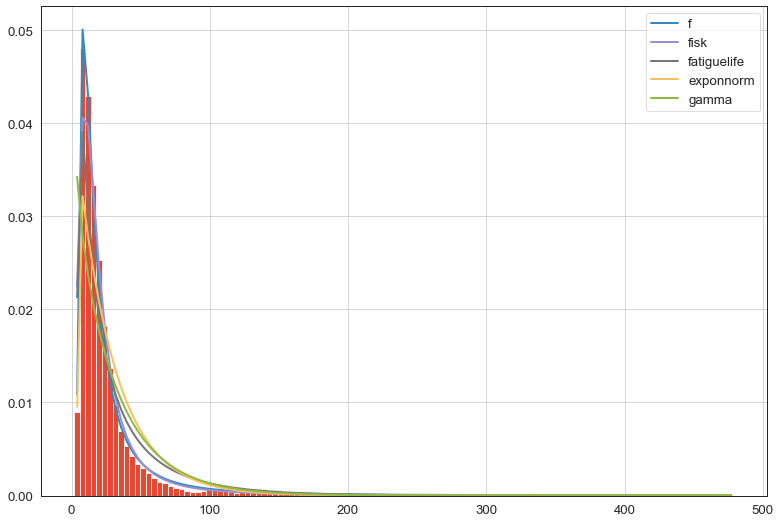

In [21]:
f = Fitter(rides,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins = 120)
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
lognorm,0.000369,2271.319359,-1.000641e+06,0.073374
genexpon,0.001627,2740.232424,-9.215393e+05,0.239891
levy,0.001675,1820.290241,-9.200278e+05,0.241418
gengamma,0.001941,2574.491290,-9.121357e+05,0.270726
loggamma,0.004469,3859.365352,-8.677429e+05,0.829188


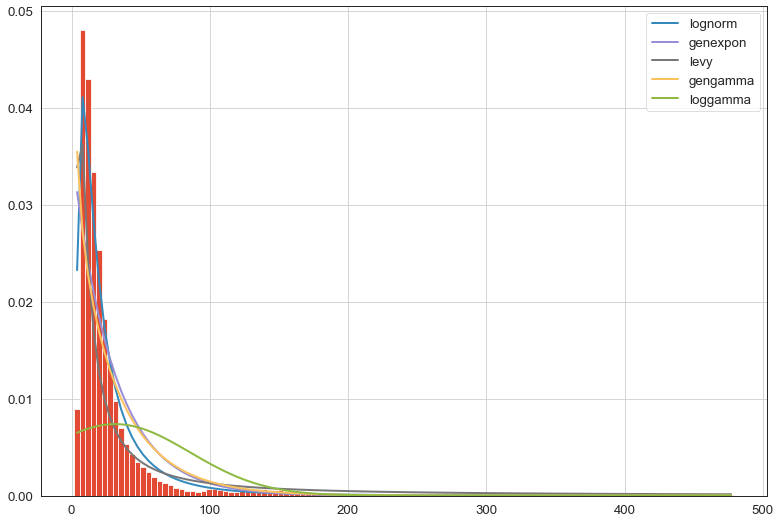

In [22]:
f = Fitter(rides,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins = 120)
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
t,0.000726,2288.989145,-964513.269484,0.080907
pearson3,0.001761,2663.592578,-917329.678033,0.249829
logistic,0.002799,3858.095659,-892679.420990,0.361571
powerlaw,0.004170,1623.094184,-871431.002010,0.920390
pareto,0.007441,1928.674723,-840591.061141,0.730471


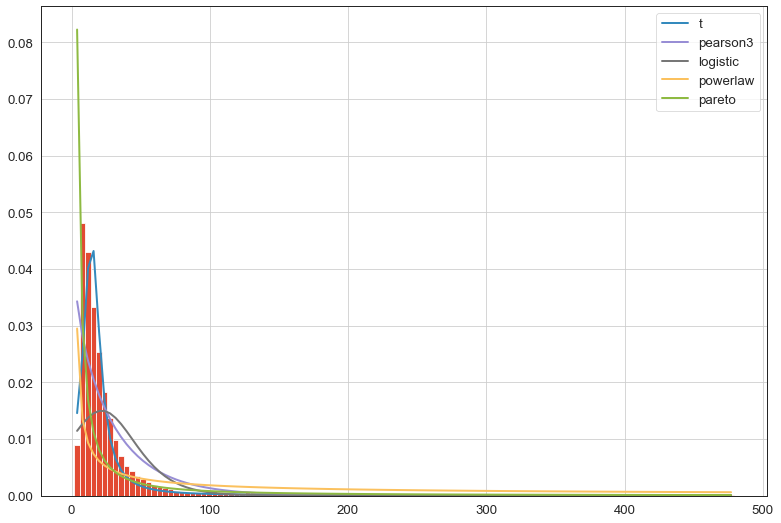

In [23]:
f = Fitter(rides,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'], bins = 120)
f.fit()
f.summary()

### Best distributions chosen from the above analysis

,sumsquare_error,aic,bic,kl_div
burr,0.000029,2119.470167,-1.135468e+06,0.015479
f,0.000035,2121.704132,-1.126200e+06,0.017072
alpha,0.000041,2076.649165,-1.117234e+06,0.012575


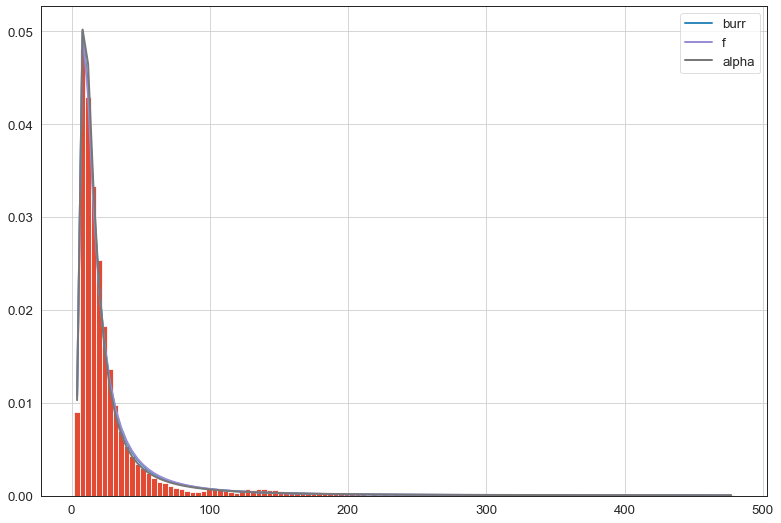

In [24]:
f = Fitter(rides,
           distributions= ['alpha','f', 'burr'], bins = 120)
f.fit()
f.summary()

In [25]:
f.get_best(method = 'sumsquare_error')

{'burr': {'c': 1.4606266060819526,
  'd': 77.22644022895821,
  'loc': -0.11379109441866286,
  'scale': 0.6528264117499702}}

In [26]:
f.get_best(method = 'aic')

{'alpha': {'a': 1.3168238155880854,
  'loc': -3.2503233467947164,
  'scale': 27.605217886065013}}

In [27]:
f.get_best(method = 'bic')

{'burr': {'c': 1.4606266060819526,
  'd': 77.22644022895821,
  'loc': -0.11379109441866286,
  'scale': 0.6528264117499702}}